In [15]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl
import seaborn.apionly as sns
sns.set_context('poster')
%matplotlib inline

In [2]:
df = pd.read_csv('results/delta_chi2.csv')
df_fixed = pd.read_csv('results/delta_chi2_fixed.csv')

In [3]:
df.head()

,"N_scale: 1024, log_Npix: 0","N_scale: 1024, log_Npix: 2","N_scale: 1024, log_Npix: 4","N_scale: 128, log_Npix: 0","N_scale: 128, log_Npix: 2","N_scale: 128, log_Npix: 4","N_scale: 2048, log_Npix: 0","N_scale: 2048, log_Npix: 2","N_scale: 2048, log_Npix: 4","N_scale: 256, log_Npix: 0","N_scale: 256, log_Npix: 2","N_scale: 256, log_Npix: 4","N_scale: 512, log_Npix: 0","N_scale: 512, log_Npix: 2","N_scale: 512, log_Npix: 4"
0,-4196.608718,-854.799090,-142.652601,-3383.480579,-901.269036,-173.508724,-3793.157552,-853.198574,-168.815642,-5391.189548,-923.767389,-124.040707,-4342.480783,-885.714856,-172.742660
1,-4125.958480,-850.795384,-163.142796,-2113.844731,-892.915185,-133.050974,-3909.792666,-840.451773,-164.755676,-3498.231025,-847.388558,-132.186334,-3281.093853,-853.261206,-162.017980
2,-3854.447803,-852.449706,-167.357921,-2859.129971,-893.624827,-122.703883,-3868.857142,-838.855276,-162.944094,-3583.980530,-846.243065,-146.032182,-3145.116693,-805.367780,-147.425663
3,-4155.197940,-823.222769,-146.206919,-3838.686957,-878.289544,-138.618032,-3900.965743,-846.904958,-162.011236,-4257.064044,-871.537861,-220.507642,-4230.453747,-890.650783,-156.938657
4,-4112.173861,-834.861472,-167.483059,-2391.883475,-840.698554,-81.193514,-3984.295559,-836.045459,-164.667212,-3042.054429,-1070.804476,-161.458036,-4043.564786,-861.092545,-145.095209


In [4]:
df_fixed.head()

,"N_scale: 1024, log_Npix: 0","N_scale: 1024, log_Npix: 2","N_scale: 1024, log_Npix: 4","N_scale: 128, log_Npix: 0","N_scale: 128, log_Npix: 2","N_scale: 128, log_Npix: 4","N_scale: 2048, log_Npix: 0","N_scale: 2048, log_Npix: 2","N_scale: 2048, log_Npix: 4","N_scale: 256, log_Npix: 0","N_scale: 256, log_Npix: 2","N_scale: 256, log_Npix: 4","N_scale: 512, log_Npix: 0","N_scale: 512, log_Npix: 2","N_scale: 512, log_Npix: 4"
0,-2954.303069,-881.103982,-291.304335,-243.103969,-7.934740,-4.352655,-2822.924324,-849.954385,-295.489681,-3229.454539,-971.741530,-179.836898,-2959.548620,-828.797695,-187.256021
1,-2990.518792,-912.909680,-286.148725,-173.439842,-5.724491,-4.758477,-2873.884839,-843.370814,-291.095987,-2495.395041,-893.576913,-154.212387,-2781.217482,-803.124200,-252.335535
2,-2964.418131,-834.208669,-281.825163,-201.451713,-5.724491,-2.613244,-2821.855627,-827.315331,-290.726462,-2848.946652,-923.705342,-154.146935,-2835.279602,-943.967227,-284.956703
3,-2912.626323,-875.520876,-262.882089,-210.825557,-46.332646,-4.534476,-2924.420026,-876.178995,-291.632972,-3178.308210,-824.517080,-201.182701,-3503.492490,-866.301468,-206.378851
4,-2842.622168,-844.988748,-272.940838,-188.266968,-5.724491,-4.790545,-2876.847304,-849.129047,-293.836637,-3170.943895,-986.008485,-250.056475,-3070.179777,-876.060027,-243.900212


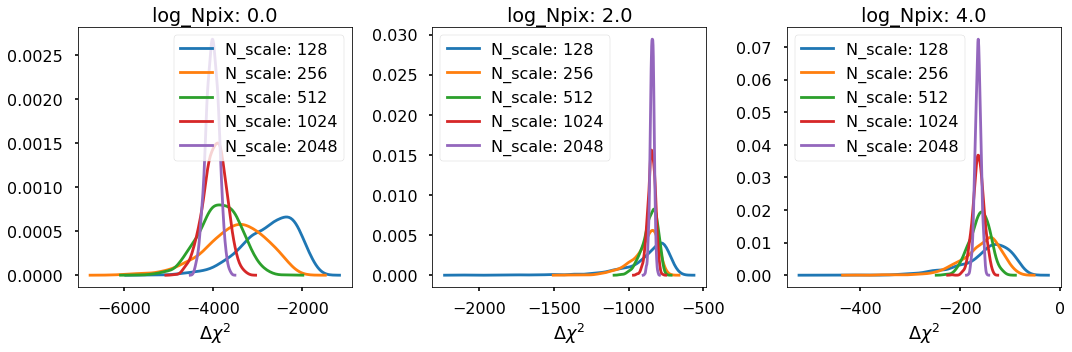

In [22]:
N_scale = [128, 256, 512, 1024, 2048]
log_Npix = [0, 2, 4]
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
for i, axis in enumerate(axes):
    for n in N_scale:
        vals = df['N_scale: %d, log_Npix: %d'%(n, log_Npix[i])].values
        sns.kdeplot(vals, ax=axis, label='N_scale: %d'%n)
        axis.set_title('log_Npix: %.1f'%(log_Npix[i]))
        axis.set_xlabel(r'$\Delta \chi^2$')
plt.tight_layout()

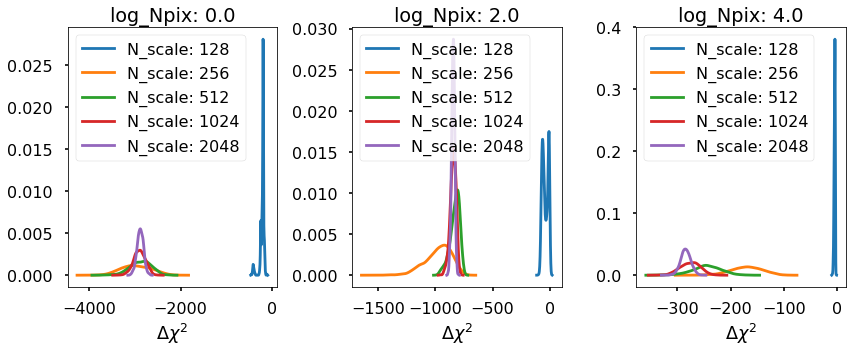

In [23]:
N_scale = [128, 256, 512, 1024, 2048]
log_Npix = [0, 2, 4]
fig, axes = plt.subplots(ncols=3, figsize=(12,5))
for i, axis in enumerate(axes):
    for n in N_scale:
        vals = df_fixed['N_scale: %d, log_Npix: %d'%(n, log_Npix[i])].values
        sns.kdeplot(vals, ax=axis, label='N_scale: %d'%n)
        axis.set_title('log_Npix: %.1f'%(log_Npix[i]))
        axis.set_xlabel(r'$\Delta \chi^2$')
plt.tight_layout()